In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')

In [3]:
test = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')

census = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv')

In [4]:
A = pd.Series(train['cfips'].unique())
A


0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
3130    56037
3131    56039
3132    56041
3133    56043
3134    56045
Length: 3135, dtype: int64

In [5]:
census['cfips'].nunique()

3142

In [6]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3141 non-null   float64
 4   pct_bb_2021            3141 non-null   float64
 5   cfips                  3142 non-null   int64  
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3141 non-null   float64
 10  pct_college_2021       3141 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3141 non-null   float64
 15  pct_

In [7]:
census.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [8]:
test['cfips'].nunique()

3135

In [9]:
test.shape[0] / test['cfips'].nunique()

8.0

In [10]:
test[test['cfips'] == 1001]

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
3135,1001_2022-12-01,1001,2022-12-01
6270,1001_2023-01-01,1001,2023-01-01
9405,1001_2023-02-01,1001,2023-02-01
12540,1001_2023-03-01,1001,2023-03-01
15675,1001_2023-04-01,1001,2023-04-01
18810,1001_2023-05-01,1001,2023-05-01
21945,1001_2023-06-01,1001,2023-06-01


In [11]:
census['cfips'].nunique() , train['cfips'].nunique()

(3142, 3135)

In [12]:
unique_to_census = [ c for c in census['cfips'].unique() if c not in train['cfips'].unique()]
unique_to_census


[2158, 2261, 31117, 46102, 51580, 51640, 51690]

In [13]:
census.loc[census['cfips'].isin(unique_to_census)]

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
81,58.4,62.5,65.3,66.1,70.0,2158,3.0,3.3,2.8,2.6,...,1.7,1.9,1.2,1.1,0.9,36468,35539.0,36754,37358.0,37975.0
92,80.5,79.1,80.4,NaN,NaN,2261,23.1,19.0,16.5,NaN,...,3.3,3.9,5.3,NaN,NaN,86019,82306.0,79867,NaN,NaN
1712,62.0,59.6,62.8,68.8,78.6,31117,19.6,18.0,17.6,18.5,...,3.8,0.0,0.0,0.0,0.0,60714,48882.0,48125,51932.0,53750.0
2412,44.8,48.5,45.2,53.0,56.5,46102,9.5,8.7,7.3,6.8,...,0.5,0.6,0.0,0.0,0.0,27804,30347.0,31997,31423.0,33192.0
2921,59.8,69.0,77.2,80.1,82.9,51580,8.7,10.3,10.4,10.3,...,2.0,1.9,1.6,0.4,0.4,35546,39432.0,40655,41024.0,41242.0
2928,63.1,66.8,68.5,75.4,81.7,51640,5.7,7.4,8.3,9.7,...,1.1,0.6,1.5,0.8,0.8,31311,31938.0,33575,35184.0,39808.0
2936,63.4,72.1,73.9,76.6,80.2,51690,13.1,14.1,14.2,14.5,...,1.4,1.7,1.7,1.6,0.3,33545,33224.0,34371,36166.0,36832.0


In [14]:
census_1001 = census[census['cfips']==1001]
census_1001

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [15]:
# pct_bb_ % of household with access to broadband
# pct_college_  % of population with college degree
# pct_foreign_born_ % of population born in foreign countries
# pct_it_workers % of population engaged in IT industory
# median_hh_inc_ median household income 

In [16]:
train_1001 = train[train['cfips']==1001]
train_1001

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
5,1001_2020-01-01,1001,Autauga County,Alabama,2020-01-01,2.969090,1242
6,1001_2020-02-01,1001,Autauga County,Alabama,2020-02-01,2.909326,1217
7,1001_2020-03-01,1001,Autauga County,Alabama,2020-03-01,2.933231,1227
8,1001_2020-04-01,1001,Autauga County,Alabama,2020-04-01,3.000167,1255
9,1001_2020-05-01,1001,Autauga County,Alabama,2020-05-01,3.004948,1257


In [17]:
import matplotlib.pyplot as plt

In [18]:
train['first_day_of_month'] = pd.to_datetime(train['first_day_of_month'])

In [19]:
train_1001


,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
5,1001_2020-01-01,1001,Autauga County,Alabama,2020-01-01,2.969090,1242
6,1001_2020-02-01,1001,Autauga County,Alabama,2020-02-01,2.909326,1217
7,1001_2020-03-01,1001,Autauga County,Alabama,2020-03-01,2.933231,1227
8,1001_2020-04-01,1001,Autauga County,Alabama,2020-04-01,3.000167,1255
9,1001_2020-05-01,1001,Autauga County,Alabama,2020-05-01,3.004948,1257


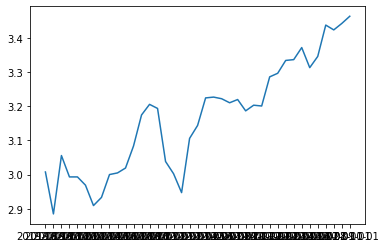

In [20]:
plt.plot('first_day_of_month', 'microbusiness_density', data=train_1001)

plt.show()

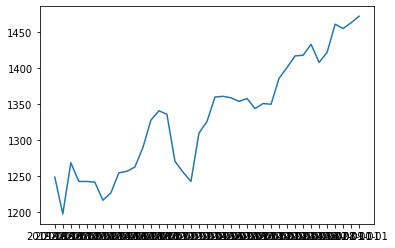

In [21]:
plt.plot('first_day_of_month', 'active', data=train_1001)

plt.show()

In [22]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = pd.rolling_mean(ts, window=6)
    rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    


In [23]:
check_adfuller(train_1001['microbusiness_density'])

Test statistic:  0.9881707095895986
p-value:  0.9941395544199386
Critical Values: {'1%': -3.6790595944893187, '5%': -2.9678817237279103, '10%': -2.6231583472057074}


In [24]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
# import plotly.plotly as py

In [25]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
print(os.listdir("../input"))

['godaddy-microbusiness-density-forecasting']


In [27]:
train_1001.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [28]:
train_1001['microbusiness_change'] = train_1001['microbusiness_density'].div(train_1001['microbusiness_density'][0]).mul(100)

train_1001['active_change'] = train_1001['active'].div(train_1001['active'][0]).mul(100)

In [29]:
train_1001['first_day_of_month'] = pd.to_datetime(train_1001['first_day_of_month'])

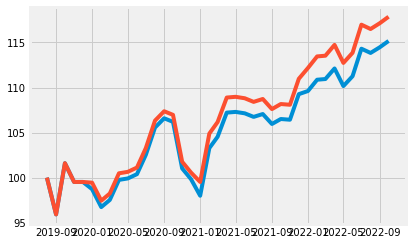

In [30]:
plt.plot('first_day_of_month', 'microbusiness_change', data=train_1001)
plt.plot('first_day_of_month', 'active_change', data=train_1001)
plt.show()

In [31]:
# train_1001['microbusiness_density'].diff().plot()


check_adfuller(train_1001['microbusiness_density'].diff()[1:])
#decomposed_train_1001_micro = sm.tsa.seasonal_decompose(train_1001['microbusiness_density'], freq=39)
#figure = decomposed_train_1001_micro.plot()
#plt.show()

Test statistic:  -4.587152029380602
p-value:  0.0001363991989102668
Critical Values: {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}


In [32]:
#  census_1001 = census[census['cfips']==1001]
train['cfips'].unique()

array([ 1001,  1003,  1005, ..., 56041, 56043, 56045])

In [33]:
# train_1001 = train[train['cfips']==1001]
train_1003 = train[train['cfips']==1003]

check_adfuller(train_1003['microbusiness_density'].diff()[1:])

Test statistic:  -5.672699351444524
p-value:  8.847250133490405e-07
Critical Values: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}


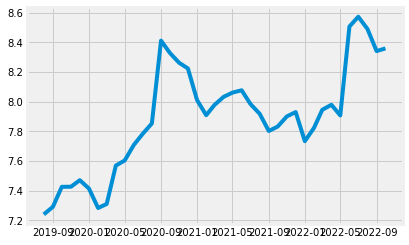

In [34]:
plt.plot('first_day_of_month', 'microbusiness_density', data=train_1003)

plt.show()

In [35]:
census_1001.T

   

,0
pct_bb_2017,76.6
pct_bb_2018,78.9
pct_bb_2019,80.6
pct_bb_2020,82.7
pct_bb_2021,85.5
cfips,1001.0
pct_college_2017,14.5
pct_college_2018,15.9
pct_college_2019,16.1
pct_college_2020,16.7


In [36]:
census_1001_ = pd.DataFrame({'BroadBand':[76.6, 78.9, 80.6, 82.7, 85.5],
                             'College':[14.5, 15.9, 16.1, 16.7, 16.7], 
                             'Foreign':[2.1, 2.0, 2.3, 2.3, 2.1],
                             'IT':[1.3, 1.1, 0.7, 0.6, 1.1],
                             'Income':[55317, 58786, 58731, 57982, 62660] 
                            })
census_1001_

,BroadBand,College,Foreign,IT,Income
0,76.6,14.5,2.1,1.3,55317
1,78.9,15.9,2.0,1.1,58786
2,80.6,16.1,2.3,0.7,58731
3,82.7,16.7,2.3,0.6,57982
4,85.5,16.7,2.1,1.1,62660


In [37]:
#for cfips in train.cfips.unique():
    #print(cfips)

In [38]:
1001
1003
1005
1007
1009
1011
1013
1015
1017
1019
1021
1023
1025
1027
1029
1031
1033
1035
1037
1039
1041
1043
1045
1047
1049
1051
1053
1055
1057
1059
1061
1063
1065
1067
1069
1071
1073
1075
1077
1079
1081
1083
1085

1085

In [39]:
#[1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,1021,1023]:
    